In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

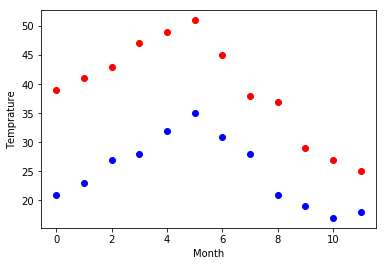

In [3]:
month = np.arange(12)
plt.plot(month, Max, 'ro')
plt.plot(month, Min, 'bo')
plt.xlabel('Month')
plt.ylabel('Temprature')
plt.show()

In [4]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      Min, [-40, 20, 0])

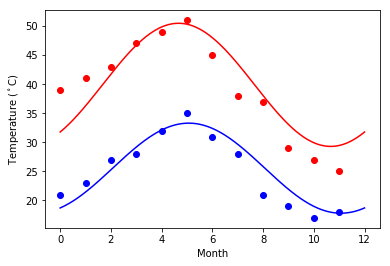

In [5]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(month, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## TASK :2

In [6]:
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [7]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 1. Create a pie chart presenting the male/female proportion

In [8]:
count=titanic['sex'].value_counts()
print(count)

male      843
female    466
Name: sex, dtype: int64


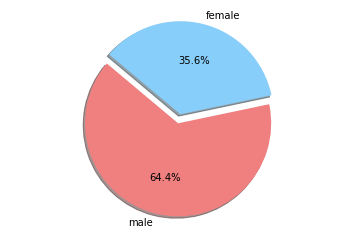

In [9]:
labels = 'Male', 'Female'
colors = ['lightcoral', 'lightskyblue']
explode = [0,0.1]
plt.pie(count.values.tolist(), explode=explode, labels=count.index.values.tolist(), colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

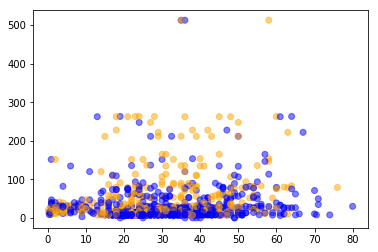

In [10]:
titanic = titanic.dropna(subset=['sex'])

colors = {'male':'blue', 'female':'orange'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(colors))
plt.show()